**Handling Numeric Missing values**


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [50]:
df = pd.read_csv('titanic.csv')

In [51]:
df['Family'] = df['Parch'] + df['SibSp']

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [53]:
newdf = df[['Fare','Survived','Family','Age']]

In [54]:
newdf.head()

,Fare,Survived,Family,Age
0,7.2500,0,1,22.0
1,71.2833,1,1,38.0
2,7.9250,1,0,26.0
3,53.1000,1,1,35.0
4,8.0500,0,0,35.0


In [55]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fare      891 non-null    float64
 1   Survived  891 non-null    int64  
 2   Family    891 non-null    int64  
 3   Age       714 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [56]:
newdf.isnull().mean()

Fare        0.000000
Survived    0.000000
Family      0.000000
Age         0.198653
dtype: float64

<Axes: ylabel='Density'>

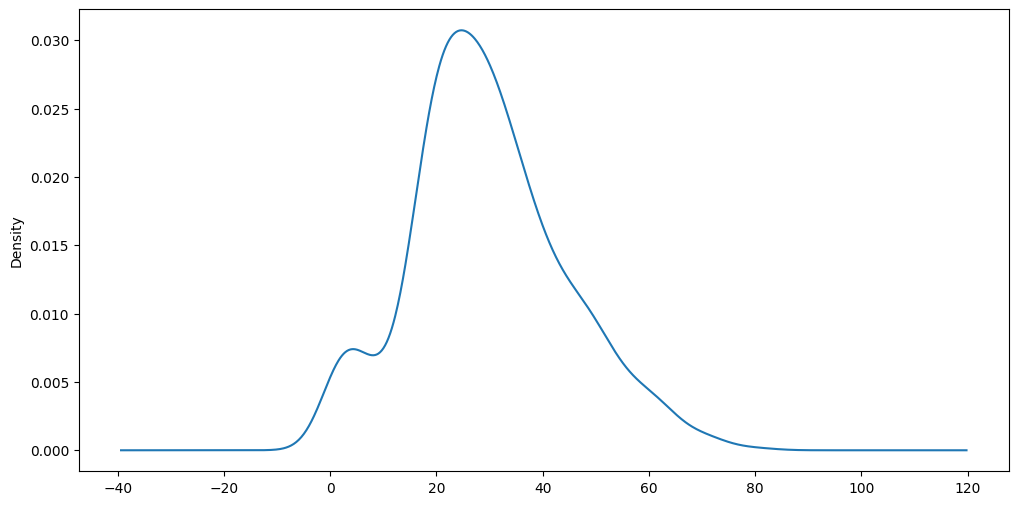

In [57]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
newdf['Age'].plot(kind='kde',ax=ax)


In [58]:
x_train,x_test,y_train,y_test = train_test_split((newdf[['Fare','Age','Family']]),(newdf['Survived']),
                                                 random_state=42,
                                                 test_size=0.2)

In [59]:
x_train.shape , x_test.shape

((712, 3), (179, 3))

**Simple Imputer**

In [60]:
imputer1 = SimpleImputer(strategy='median')


In [61]:
trf = ColumnTransformer([
    ('tr1',imputer1,['Age'])
],remainder='passthrough')

In [62]:
trf.fit(x_train)

,transformers,"[('tr1', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [65]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [66]:
x_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.1083,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])

**Using Simple Imputer**

In [67]:
x_train,x_test,y_train,y_test = train_test_split((newdf[['Fare','Age','Family']]),(newdf['Survived']),
                                                 random_state=42,
                                                 test_size=0.2)

In [68]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)

In [69]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age'])
])

In [70]:
trf.fit(x_train)

,transformers,"[('imputer1', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,99


In [72]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

#### Most frequent Imputation

In [79]:
dt = pd.read_csv('housepricing.csv')[['GarageQual','FireplaceQu','SalePrice']]

In [80]:
dt.head()

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000


In [81]:
dt.isnull().mean()*100

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

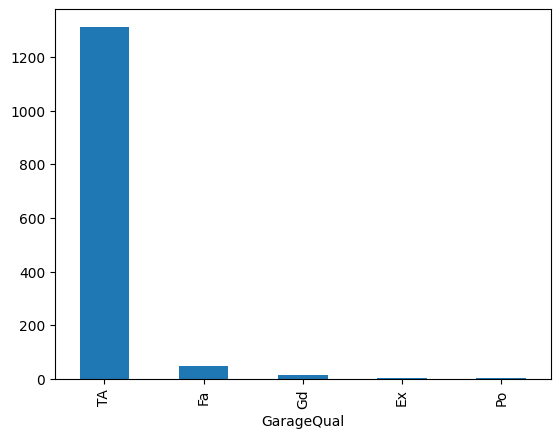

In [82]:
dt['GarageQual'].value_counts().plot(kind='bar')

In [84]:
dt['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [85]:
temp = dt[dt['GarageQual'] == 'TA']['SalePrice']

In [86]:
dt['GarageQual'].fillna('TA',inplace=True)

<Axes: xlabel='GarageQual'>

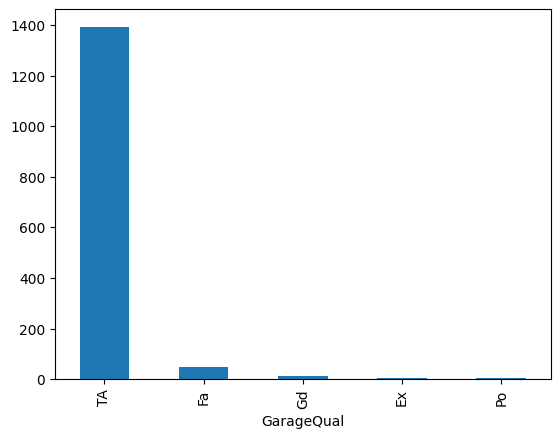

In [88]:
dt['GarageQual'].value_counts().plot(kind='bar')

<Axes: ylabel='Density'>

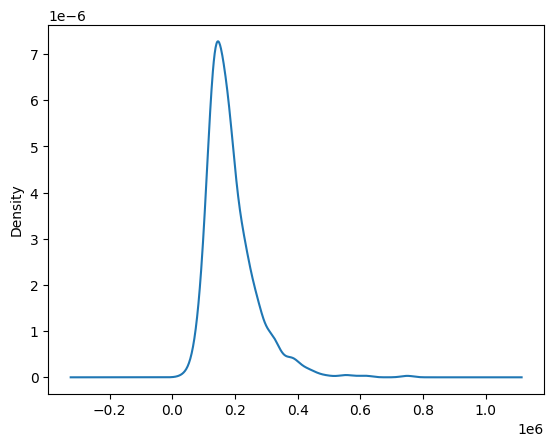

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)